# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
#respose = requests.get(url)
#query_url = f"{url}appid={api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    #city_json = city_response.json()
    #city_response = requests.get(city_url).json()
    
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | severo-yeniseyskiy
Processing Record 2 of Set 1 | dakhla
Processing Record 3 of Set 1 | lages
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | piedra blanca
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | vilyuchinsk
Processing Record 8 of Set 1 | kudahuvadhoo
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | brookings
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | praia da vitoria
Processing Record 15 of Set 1 | sumenep
Processing Record 16 of Set 1 | la passe
Processing Record 17 of Set 1 | tazovsky
Processing Record 18 of Set 1 | padangsidempuan
Processing Record 19 of Set 1 | mana
Processing Record 20 of Set 1 | lucapa
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | island harbour
Pro

Processing Record 40 of Set 4 | tanjung selor
City not found. Skipping...
Processing Record 41 of Set 4 | kristiansund
Processing Record 42 of Set 4 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 43 of Set 4 | corner brook
Processing Record 44 of Set 4 | kavieng
Processing Record 45 of Set 4 | alofi
Processing Record 46 of Set 4 | muisne
Processing Record 47 of Set 4 | kapa'a
Processing Record 48 of Set 4 | iskateley
Processing Record 49 of Set 4 | puerto armuelles
Processing Record 0 of Set 5 | saint-joseph
Processing Record 1 of Set 5 | kodok
City not found. Skipping...
Processing Record 2 of Set 5 | alghero
Processing Record 3 of Set 5 | haimen
Processing Record 4 of Set 5 | weno
Processing Record 5 of Set 5 | vijayawada
Processing Record 6 of Set 5 | saynshand
Processing Record 7 of Set 5 | jamestown
Processing Record 8 of Set 5 | zelenogorsk
Processing Record 9 of Set 5 | ratodero
Processing Record 10 of Set 5 | puerto carreno
Processing Record 11 of Set 5 | tinajo
P

Processing Record 30 of Set 8 | mont-laurier
Processing Record 31 of Set 8 | jalai nur
Processing Record 32 of Set 8 | calchaqui
Processing Record 33 of Set 8 | namibe
Processing Record 34 of Set 8 | gamba
Processing Record 35 of Set 8 | morbegno
Processing Record 36 of Set 8 | burgas
Processing Record 37 of Set 8 | chake chake
Processing Record 38 of Set 8 | winejok
City not found. Skipping...
Processing Record 39 of Set 8 | mhamid
Processing Record 40 of Set 8 | talakan
Processing Record 41 of Set 8 | leua
Processing Record 42 of Set 8 | sijunjung
Processing Record 43 of Set 8 | quincy
Processing Record 44 of Set 8 | urengoy
Processing Record 45 of Set 8 | saint-philippe
Processing Record 46 of Set 8 | zheleznodorozhnyy
Processing Record 47 of Set 8 | gallivare
City not found. Skipping...
Processing Record 48 of Set 8 | mena
Processing Record 49 of Set 8 | bayganin
Processing Record 0 of Set 9 | alto araguaia
Processing Record 1 of Set 9 | slave lake
Processing Record 2 of Set 9 | fo

Processing Record 21 of Set 12 | itumbiara
Processing Record 22 of Set 12 | kilifi
Processing Record 23 of Set 12 | broome
Processing Record 24 of Set 12 | mokhsogollokh
Processing Record 25 of Set 12 | adrar
Processing Record 26 of Set 12 | morris
Processing Record 27 of Set 12 | ust-tsilma
Processing Record 28 of Set 12 | walvis bay
Processing Record 29 of Set 12 | el fasher
Processing Record 30 of Set 12 | sterling
Processing Record 31 of Set 12 | puerto baquerizo moreno
Processing Record 32 of Set 12 | noosa heads
Processing Record 33 of Set 12 | idri
Processing Record 34 of Set 12 | north bend
Processing Record 35 of Set 12 | cairns city
City not found. Skipping...
Processing Record 36 of Set 12 | wamba
Processing Record 37 of Set 12 | yorkton
Processing Record 38 of Set 12 | dosso
Processing Record 39 of Set 12 | seogwipo
City not found. Skipping...
Processing Record 40 of Set 12 | vilyuysk
Processing Record 41 of Set 12 | guider
Processing Record 42 of Set 12 | kruisfontein
Proc

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,severo-yeniseyskiy,60.3725,93.0408,15.78,66,47,1.73,RU,1689979476
1,dakhla,23.6848,-15.9580,20.68,84,0,12.55,EH,1689979476
2,lages,-27.8161,-50.3261,12.97,94,32,2.81,BR,1689979476
3,lebu,-37.6167,-73.6500,10.58,91,100,3.69,CL,1689979476
4,piedra blanca,18.8443,-70.3169,30.96,73,43,1.64,DO,1689979476


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,severo-yeniseyskiy,60.3725,93.0408,15.78,66,47,1.73,RU,1689979476
1,dakhla,23.6848,-15.9580,20.68,84,0,12.55,EH,1689979476
2,lages,-27.8161,-50.3261,12.97,94,32,2.81,BR,1689979476
3,lebu,-37.6167,-73.6500,10.58,91,100,3.69,CL,1689979476
4,piedra blanca,18.8443,-70.3169,30.96,73,43,1.64,DO,1689979476


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

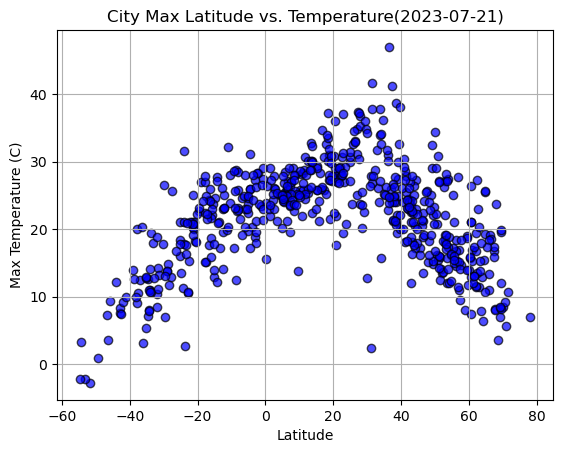

In [31]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o",
             facecolors="blue", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature(2023-07-21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

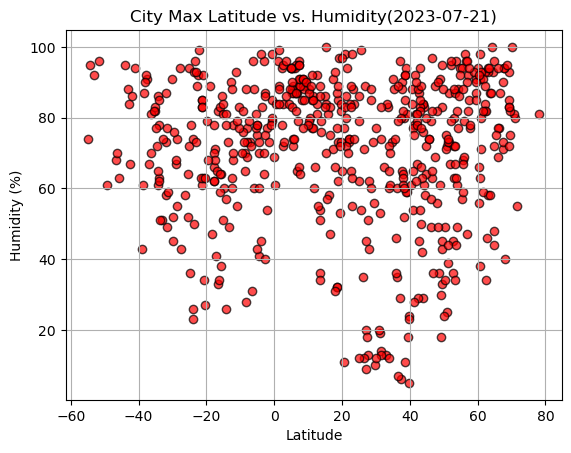

In [30]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o",
             facecolors="red", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity(2023-07-21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

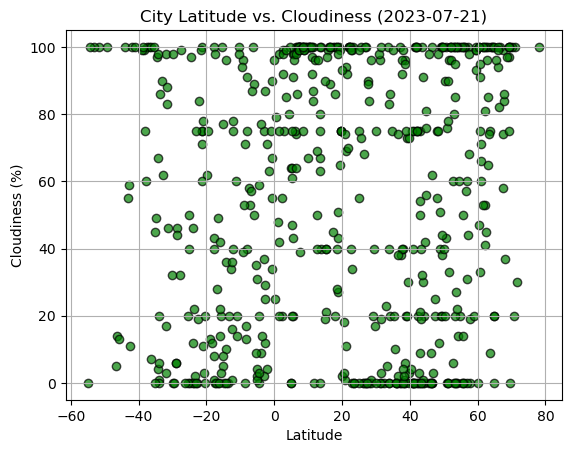

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o",
             facecolors="green", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-07-21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

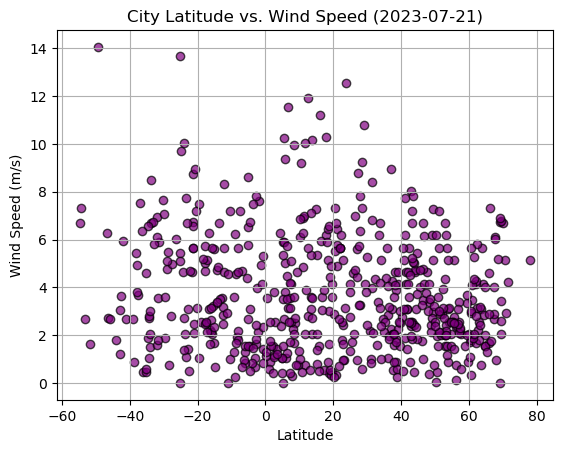

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o",
             facecolors="purple", edgecolors="black", alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-07-21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
def linear_regress(x_values, y_values, line): 
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)

    # Label plot and annotate the line equation
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    #plt.ylabel('y_values.name')
    plt.annotate(line_eq,line,fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,severo-yeniseyskiy,60.3725,93.0408,15.78,66,47,1.73,RU,1689979476
1,dakhla,23.6848,-15.9580,20.68,84,0,12.55,EH,1689979476
4,piedra blanca,18.8443,-70.3169,30.96,73,43,1.64,DO,1689979476
5,ribeira grande,38.5167,-28.7000,20.99,92,96,1.82,PT,1689979476
6,vilyuchinsk,52.9306,158.4028,19.15,80,80,4.33,RU,1689979476


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,lages,-27.8161,-50.3261,12.97,94,32,2.81,BR,1689979476
3,lebu,-37.6167,-73.6500,10.58,91,100,3.69,CL,1689979476
8,blackmans bay,-43.0167,147.3167,7.63,88,55,3.04,AU,1689979477
12,adamstown,-25.0660,-130.1015,21.08,72,50,13.66,PN,1689979477
14,sumenep,-7.0167,113.8667,24.65,73,53,4.70,ID,1689979477


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.3338298034267047


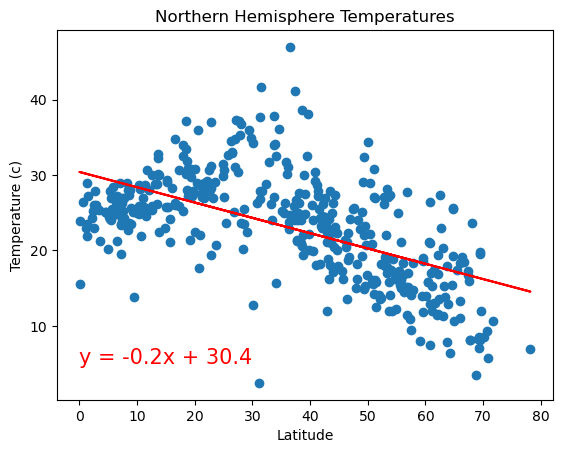

In [60]:
# Linear regression on Northern Hemisphere

plt.title('Northern Hemisphere Temperatures')
plt.ylabel("Temperature (c)")

linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],(0,5))



The r-value is: 0.6110784237010294


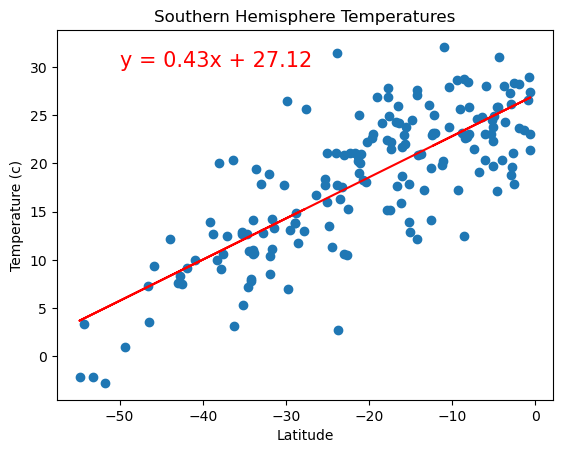

In [61]:
# Linear regression on Southern Hemisphere
plt.title('Southern Hemisphere Temperatures')
plt.ylabel("Temperature (c)")
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],(-50,30))


**Observations on cities in the Northern and Southern Hemispheres with Max Temp and Latitude Regression plots:**

1. For both the hemispheres, there is a positive linear relationship between the temperature and latitude.
2. In the Northern hemishpere, the linear relationship is weak. 
3. In the Southern hemisphere, the linear relationship looks moderate, with more scattered points.   

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.005305153335028373


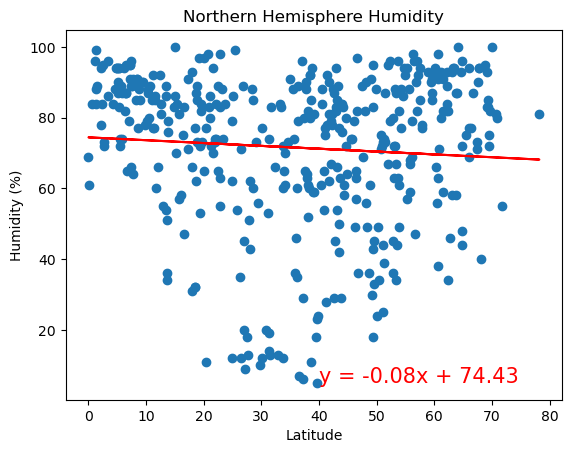

In [64]:
# Northern Hemisphere
plt.title('Northern Hemisphere Humidity')
plt.ylabel("Humidity (%)")
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],(40,5))

The r-value is: 0.00681850908334482


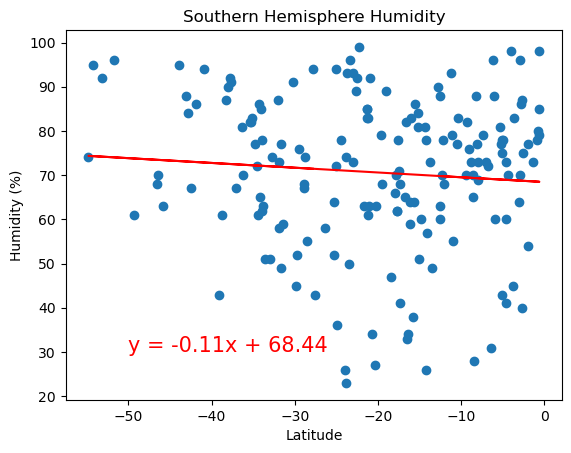

In [65]:
# Southern Hemisphere
plt.title('Southern Hemisphere Humidity')
plt.ylabel("Humidity (%)")
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],(-50,30))

**Discussion about the linear relationship between Latitude and Humidity in Northern and Southern Hemishperes:**
1. There is no linear relationship between humidity and latitude in the Northern hemisphere.
2. There is no linear relationship between humidity and latitude in the Southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.009565215270009296


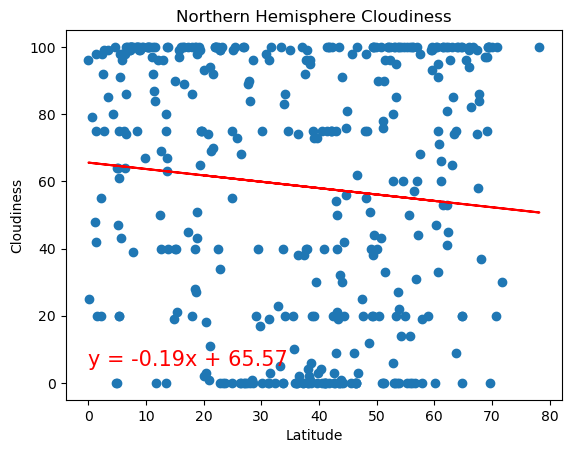

In [66]:
# Northern Hemisphere
plt.title('Northern Hemisphere Cloudiness')
plt.ylabel("Cloudiness")
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],(0,5))

The r-value is: 0.025790729525165243


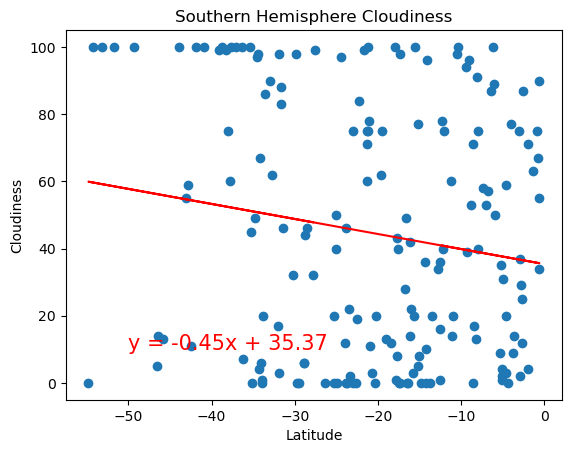

In [67]:
# Southern Hemisphere
plt.title('Southern Hemisphere Cloudiness')
plt.ylabel("Cloudiness")
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],(-50,10))

**Discussion about the linear relationship between Latitude and Cloudiness in Northern and Southern Hemispheres:** 
Looking at the scatter plots with the lines of best fit, for the Northern and Southern Hemispeheres, it is concluded that there is no linear relationship between Latitudes and Cloudiness, with r-values being very close to zero. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.005918755239965898


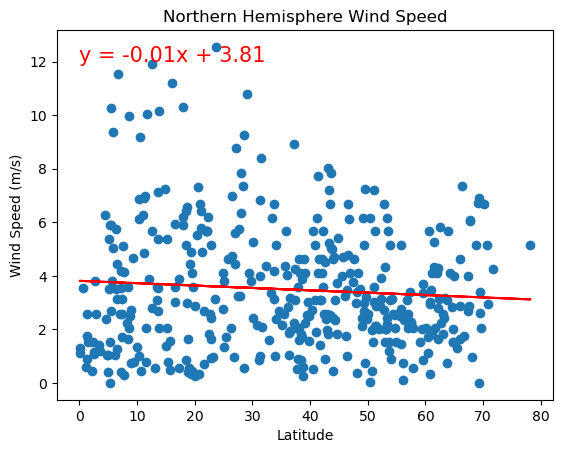

In [68]:
# Northern Hemisphere
plt.title('Northern Hemisphere Wind Speed')
plt.ylabel("Wind Speed (m/s)")
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],(0,12))

The r-value is: 0.022582697133552754


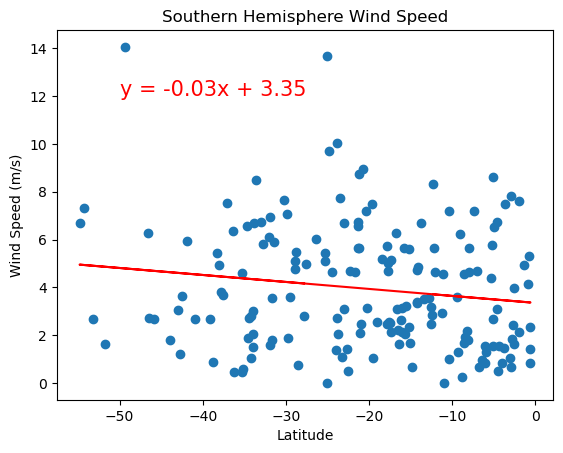

In [70]:
# Southern Hemisphere
plt.title('Southern Hemisphere Wind Speed')
plt.ylabel("Wind Speed (m/s)")
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],(-50,12))

**Discussion about the linear relationship between Latitude and Wind speed in Northern and Southern Hemispheres:**
Looking at the scatter plots with the lines of best fit, for the Northern and Southern Hemispeheres, it is concluded that there is no linear relationship between Latitudes and Wind speed, since the r-values are very close to zero. 